Voorbeeld notebook om met de fews-pi module van hkv.services te werken. Dit moet in principe elke fews pi service zijn die lokaal of publiekelijk toegankgelijk is.

Allereerst, importeer de module als volgt:

In [2]:
from hkvfewspy.io.fewspi import pi

De volgende functies zijn bij het opstarten beschikbaar

In [3]:
[ x for x in dir(pi) if "__" not in x ]

['errors',
 'getFilters',
 'getLocations',
 'getParameters',
 'getTimeSeries',
 'getTimeZoneId',
 'setClient',
 'utils']

Om een pi service uit te lezen moet deze eerst als client gezet worden. Dit kan met de functie `setClient`. Een wsdl service URL moet ingevuld worden en dat is bijvoorbeeld `http://www.oms-waddenzee.nl:8081/FewsPiService/fewspiservice?wsdl` of `http://localhost:8101/FewsPiService?wsdl`

In [4]:
pi.setClient(wsdl = 'http://www.oms-waddenzee.nl:8081/FewsPiService/fewspiservice?wsdl')

Vervolgens kan je filters uitlezen welke binnen de service bekend zijn. Wanneer de client bekend is heeft deze functie verder geen parameters nodig

In [5]:
filters = pi.getFilters()
vars(filters)

{'f_fewsPi': {'description': '', 'id': 'f_fewsPi', 'name': 'Fews-Pi service'},
 'f_trend_1': {'description': '', 'id': 'f_trend.1', 'name': 'Cut-data'},
 'f_trend_2': {'description': '', 'id': 'f_trend.2', 'name': 'Fill-data'},
 'f_werk_1': {'description': '',
  'id': 'f_werk.1',
  'name': 'Baggeren + Zandwinning + Agiteren (/baggervak)'},
 'f_werk_2': {'description': '',
  'id': 'f_werk.2',
  'name': 'Verspreiden (/verspreidingsvak)'}}

De filters worden als attributen onder het filters object gehangen op basis van het filter id onder `pi.Filters`, waarbij vreemde karaketers (zoals een `.`) worden omgezet in `_`

In [6]:
filters.f_werk_1

{'description': '',
 'id': 'f_werk.1',
 'name': 'Baggeren + Zandwinning + Agiteren (/baggervak)'}

Een uitgelezen filter welke als attribute is toegevoegd kan gebruikt worden als `filterId`.

In [7]:
filterId = pi.Filters.f_werk_1['id']
print (filterId)

f_werk.1


Vervolgens kunnen de locties voor de desbetreffende filter uitgelezen worden met de `getLocations` functie. Met `setFormat` kan het formaat worden bepaald hoe het object teruggegeven moet worden. Dit kan zijn:
- `gdf` voor een GeoDataFrame formaat
- `geojson` voor een GeoJSON formaat
- `dict` voor een Dictionary formaat

(De verschillende formaten worden momenteel allemaal ook als attributes bijgeschreven onder het `pi.Locations` object)

In [8]:
gdf = pi.getLocations(filterId = filterId,
                      setFormat = 'gdf')

Met een GeoDataFrame formaat kan je het gelijk visualiseren of -gewoon- als DataFrame vervolg acties op doen

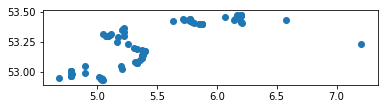

In [9]:
%matplotlib inline
gdf.plot()

In [10]:
gdf.head()

,locationId,shortName,x,y,geometry
bv_1_7_1_1,bv.1.7.1.1,"Den Helder - Texel, Vaarweg",114887.0,555232.0,POINT (4.789939580471975 52.98258358193483)
bv_1_7_1_1_1_1,bv.1.7.1.1.1.1,"Den Helder veerhaven, Vak A",114278.0,553377.0,POINT (4.781104282194812 52.96586925822925)
bv_1_7_1_1_1_2,bv.1.7.1.1.1.2,"Den Helder veerhaven, Vak B",114113.0,553202.0,POINT (4.778670536487695 52.96428425924832)
bv_1_7_1_1_1_3,bv.1.7.1.1.1.3,"Den Helder veerhaven, Vak C",114243.0,553255.0,POINT (4.780598637222577 52.96477034363196)
bv_1_7_1_1_2_1,bv.1.7.1.1.2.1,"Texel veerhaven, Vak A",114395.0,557589.0,POINT (4.782320076077784 53.00372620992813)


Om een `list` te krijgen van alle beschikbare locaties doe het volgende. Er wordt vervolgens alleen de eerste 5 items getoond

In [11]:
locationIds = gdf.locationId.tolist()
locationIds[0:5]

['bv.1.7.1.1',
 'bv.1.7.1.1.1.1',
 'bv.1.7.1.1.1.2',
 'bv.1.7.1.1.1.3',
 'bv.1.7.1.1.2.1']

Zoals gezegd worden de verschillende formaten als attributes onder het `pi.Locations` object weggeschreven, waarbij het GeoJSON formaat gelijk binnen een mapping module zoals `folium` gebruikt kan worden:

In [11]:
import folium
mapa = folium.Map([53.2, 5.5],
                  zoom_start=9,
                  tiles='cartodbpositron')

geoJSONdata = pi.Locations.asGeoJSON
points = folium.features.GeoJson(pi.Locations.asGeoJSON)

mapa.add_children(points)
mapa

c:\python35\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.


Net zoals de locaties kunnen worden uitgelezen voor een filter is dat ook zo voor de parameters. Dit kan met de `getParameters` functie:

In [12]:
params = pi.getParameters(filterId=filterId)
vars(params)

{'k_m3_geagiteerd_vdlee': {'displayUnit': 'm3',
  'id': 'k.m3.geagiteerd.vdlee',
  'name': 'Kuubs geagiteerd (m3 - dagrapport)',
  'parameterType': 'instantaneous',
  'unit': 'm3',
  'usesDatum': 'true'},
 'k_m3_gebaggerd_mars': {'displayUnit': 'm3',
  'id': 'k.m3.gebaggerd.mars',
  'name': 'Kuubs gebaggerd (m3 - mars)',
  'parameterType': 'instantaneous',
  'unit': 'm3',
  'usesDatum': 'true'},
 'k_m3_gebaggerd_vdlee': {'displayUnit': 'm3',
  'id': 'k.m3.gebaggerd.vdlee',
  'name': 'Kuubs gebaggerd (m3 - dagrapport)',
  'parameterType': 'instantaneous',
  'unit': 'm3',
  'usesDatum': 'true'},
 'k_m3_zandwinning_vdlee': {'displayUnit': 'm3',
  'id': 'k.m3.zandwinning.vdlee',
  'name': 'Kuubs zand winning (m3 - dagrapport)',
  'parameterType': 'instantaneous',
  'unit': 'm3',
  'usesDatum': 'true'}}

Ook deze worden als attribute onder het object opgeslagen.

In [13]:
parameterIds = pi.Parameters.k_m3_geagiteerd_vdlee['id']
parameterIds

'k.m3.geagiteerd.vdlee'

Alle parameters kunnen als list worden opgevraagd bij de Pi service. Om een list te krijgen van de beschikbare parameterIds vanuit het `pi.Parameters` object, doe als volgt (opvragen van meerdere parameters over meerdere locaties over langere periodes resulteert nu vaak nog in een error)

In [14]:
# string_filter = 'vdlee'
# parameterIds = [getattr(pi.Parameters, named_attribute)['id'] for named_attribute in vars(pi.Parameters) if string_filter in named_attribute]
# parameterIds

Voor de `getTimeSeries` functie zijn ook nog de start en eindtijd nodig om de periode te bepalen voor de data request. Dit kan met een `datetime` object.

In [15]:
from datetime import datetime
startTime = datetime(2017,3,1)
endTime =  datetime.now()

In [24]:
parameterIds

'k.m3.geagiteerd.vdlee'

In dit geval zijn de startTime en endTime niet bewust van een timezone. In dit geval worden deze intern alsnog bepaald op basis `clientTimeZone` parameter. Standaard staat deze op `Europe/Amsterdam`. Mogelijke timezones worden bepaald met de pytz module (`import pytz`, `pytz.all_timezones`). 

Er worden items terug gegeven. Eerst het data object zelf in het gewenste `format`. En daarnaast nog een `entry`, wat op dit moment een combinatie is van `parameterId|locationId|units`. Deze `entry` zou bijvoorbeeld gebruikt kunnen worden als `key` voor een entry in de hkv.services dataportal 

Zoals gezegd zijn er meerdere formats, welke met `setFormat` ingesteld kan worden. Keuze kan gemaakt worden uit:
- `df` voor pandas DataFrame
- `json` voor een JSON formatted output
- `gzip` voor een GZIP gecomprimiteerde JSON string

In [16]:
df, entry = pi.getTimeSeries(filterId = filterId,
                             parameterIds = parameterIds, 
                             locationIds=locationIds, 
                             startTime=startTime, 
                             endTime=endTime, 
                             clientTimeZone='Europe/Amsterdam',
                             setFormat='df')
print (entry)

k.m3.geagiteerd.vdlee|bv.1.7.2.1.1.B|m3


In [17]:
df.head()

flag  \
date                      moduleId                     parameterId           units locationId     stationName                         
2017-03-01 00:00:00+01:00 pr.Reizen.vdLee.baggeracties k.m3.geagiteerd.vdlee m3    bv.1.7.1.1     Den Helder - Texel, Vaarweg   8.0   
                                                                                   bv.1.7.1.1.1.1 Den Helder veerhaven, Vak A   8.0   
                                                                                   bv.1.7.1.1.1.2 Den Helder veerhaven, Vak B   8.0   
                                                                                   bv.1.7.1.1.1.3 Den Helder veerhaven, Vak C   8.0   
                                                                                   bv.1.7.1.1.2.1 Texel veerhaven, Vak A        8.0   

                                                                                                                               value  
date                      moduleId                     parameterId           units locationId     stationName                         
2017-03-01 00:00:00+01:00 pr.Reizen.vdLee.baggeracties k.m3.geagiteerd.vdlee m3    bv.1.7.1.1     Den Helder - Texel, Vaarweg -999.0  
                                                                                   bv.1.7.1.1.1.1 Den Helder veerhaven, Vak A -999.0  
                                                                                   bv.1.7.1.1.1.2 Den Helder veerhaven, Vak B -999.0  
                                                                                   bv.1.7.1.1.1.3 Den Helder veerhaven, Vak C -999.0  
                                                                                   bv.1.7.1.1.2.1 Texel veerhaven, Vak A      -999.0

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [19]:
df.reset_index(inplace=True)
df['value'].replace(-999.0,np.NaN, inplace = True)

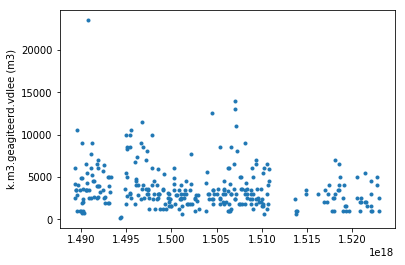

In [20]:
fig, ax = plt.subplots()
ax.plot(df['date'],df['value'],'.')
ylabel = df['parameterId'][0] + ' ('+df['units'][0]+')'
ax.set_ylabel(ylabel)
plt.show()

Ondanks dat het formaat DataFrame was opgegeven kan een JSON formatted output opgevraagd worden via het attribute onder de TimeSeries object. 

Kijk uit met opvragen van de gehele string sinds deze groot kan zijn.

In [21]:
pi.TimeSeries.asJSON[0:1000]

'[{"date":"2017-02-28T23:00:00.000Z","moduleId":"pr.Reizen.vdLee.baggeracties","parameterId":"k.m3.geagiteerd.vdlee","units":"m3","locationId":"bv.1.7.1.1","stationName":"Den Helder - Texel, Vaarweg","flag":8.0,"value":-999.0},{"date":"2017-02-28T23:00:00.000Z","moduleId":"pr.Reizen.vdLee.baggeracties","parameterId":"k.m3.geagiteerd.vdlee","units":"m3","locationId":"bv.1.7.1.1.1.1","stationName":"Den Helder veerhaven, Vak A","flag":8.0,"value":-999.0},{"date":"2017-02-28T23:00:00.000Z","moduleId":"pr.Reizen.vdLee.baggeracties","parameterId":"k.m3.geagiteerd.vdlee","units":"m3","locationId":"bv.1.7.1.1.1.2","stationName":"Den Helder veerhaven, Vak B","flag":8.0,"value":-999.0},{"date":"2017-02-28T23:00:00.000Z","moduleId":"pr.Reizen.vdLee.baggeracties","parameterId":"k.m3.geagiteerd.vdlee","units":"m3","locationId":"bv.1.7.1.1.1.3","stationName":"Den Helder veerhaven, Vak C","flag":8.0,"value":-999.0},{"date":"2017-02-28T23:00:00.000Z","moduleId":"pr.Reizen.vdLee.baggeracties","paramete

Sinds dit een row-oriented (records-style) JSON is kan het gelijk gebruikt worden in de visualaties binnen dashboards wanneer deze via de hkv.services dataportal als entry in een database wordt ingevoerd.

Na het doorlopen van alle functies zijn er een heel aantal objecten toegevoegd aan het `pi` object (vergelijk met `In [2]`)

In [22]:
[ x for x in dir(pi) if "__" not in x ]

['Filters',
 'Locations',
 'Parameters',
 'TimeSeries',
 'TimeZoneId',
 'client',
 'errors',
 'getFilters',
 'getLocations',
 'getParameters',
 'getTimeSeries',
 'getTimeZoneId',
 'setClient',
 'utils']